In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

C:\Users\Maria\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Maria\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Maria\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Maria\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [3]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [4]:
input_shape = (img_width, img_height, img_num_channels)

In [5]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [6]:
input_train = input_train / 255
input_test = input_test / 255

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [72]:
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [73]:
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/100
800/800 [==============================] - 28s 35ms/step - loss: 1.7298 - accuracy: 0.3462 - val_loss: 1.5057 - val_accuracy: 0.4464
Epoch 2/100
800/800 [==============================] - 26s 33ms/step - loss: 1.3805 - accuracy: 0.4970 - val_loss: 1.2710 - val_accuracy: 0.5429
Epoch 3/100
800/800 [==============================] - 26s 32ms/step - loss: 1.2285 - accuracy: 0.5603 - val_loss: 1.1982 - val_accuracy: 0.5743
Epoch 4/100
800/800 [==============================] - 26s 33ms/step - loss: 1.1272 - accuracy: 0.5971 - val_loss: 1.1989 - val_accuracy: 0.5728
Epoch 5/100
800/800 [==============================] - 29s 37ms/step - loss: 1.0616 - accuracy: 0.6232 - val_loss: 1.0723 - val_accuracy: 0.6207
Epoch 6/100
800/800 [==============================] - 27s 34ms/step - loss: 1.0086 - accuracy: 0.6415 - val_loss: 1.0585 - val_accuracy: 0.6236
Epoch 7/100
800/800 [==============================] - 26s 33ms/step - loss: 0.9554 - accuracy: 0.6603 - val_loss: 1.0178 - val_ac

In [78]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.83459734916687 / Test accuracy: 0.6226000189781189


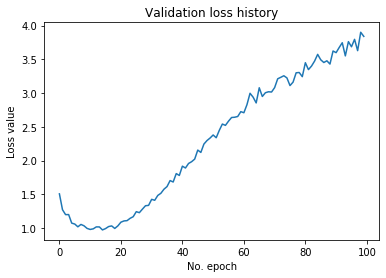

In [79]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

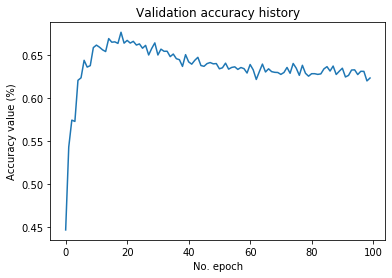

In [80]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [81]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
  
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [82]:
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [83]:
vgg2 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/100
800/800 [==============================] - 21s 27ms/step - loss: 1.7103 - accuracy: 0.4301 - val_loss: 1.3438 - val_accuracy: 0.5233
Epoch 2/100
800/800 [==============================] - 19s 24ms/step - loss: 1.2291 - accuracy: 0.5649 - val_loss: 1.2639 - val_accuracy: 0.5566
Epoch 3/100
800/800 [==============================] - 18s 23ms/step - loss: 1.1190 - accuracy: 0.6055 - val_loss: 1.2146 - val_accuracy: 0.5820
Epoch 4/100
800/800 [==============================] - 18s 23ms/step - loss: 1.0467 - accuracy: 0.6329 - val_loss: 1.1560 - val_accuracy: 0.5959
Epoch 5/100
800/800 [==============================] - 18s 23ms/step - loss: 0.9856 - accuracy: 0.6538 - val_loss: 1.1274 - val_accuracy: 0.6034
Epoch 6/100
800/800 [==============================] - 17s 21ms/step - loss: 0.9323 - accuracy: 0.6745 - val_loss: 1.1194 - val_accuracy: 0.6114
Epoch 7/100
800/800 [==============================] - 18s 22ms/step - loss: 0.8849 - accuracy: 0.6923 - val_loss: 1.1293 - val_ac

In [84]:
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 5.945140838623047 / Test accuracy: 0.5658000111579895


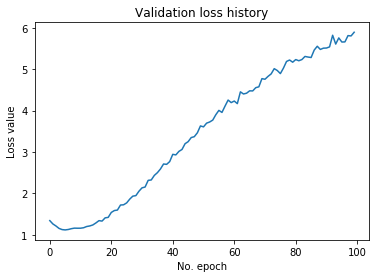

In [89]:
plt.plot(vgg2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

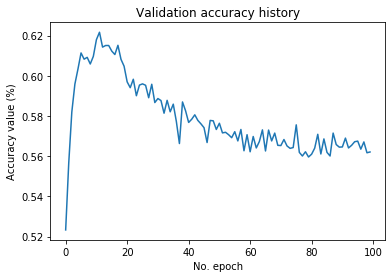

In [90]:
plt.plot(vgg2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()